<a href="https://colab.research.google.com/github/SrujanTopalle/deeplearninglab/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Write a program in deep learning to apply image processing operations
 such as Histogram equalization, Thresholding, Edge detection, Data
 augmentation, Morphological Operations.

In [54]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [24]:
def histogram_equalization(image):
  image = cv2.equalizeHist(image)
  return image

In [17]:
def thresholding(image):
  _,thresholded_img = cv2.threshold(image,128,255,cv2.THRESH_BINARY)
  return thresholded_img

In [44]:
def edge_detection(image):
  image = cv2.Canny(image,100,150)
  return image

In [51]:
def morphological_operations(image,kernel,operation):
  if operation == "Erode":
    image = cv2.erode(image,kernel,iterations=1)
  if operation == 'Dilate':
    image = cv2.dilate(image,kernel,iterations=1)
  if operation == "Open":
    image = cv2.dilate(cv2.erode(image,kernel,iterations=1),kernel,iterations=1)
  if operation == "Close":
    image = cv2.erode(cv2.dilate(image,kernel,iterations=1),kernel,iterations=1)
  return image

In [68]:
def data_augmentation(image):
    datagen = ImageDataGenerator(
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
    )
    image = image.reshape((1,) + image.shape + (1,))  # Reshape for the datagen
    aug_iter = datagen.flow(image)
    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(4)]
    return aug_images

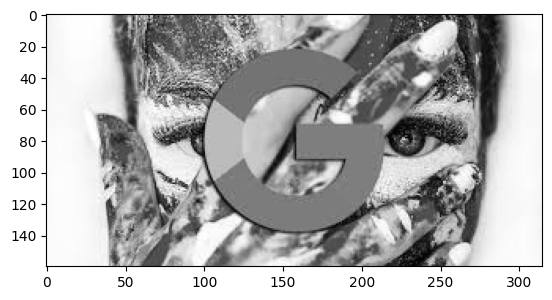

In [39]:
original_image = cv2.imread('images.jpeg')
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale_image,cmap='gray')

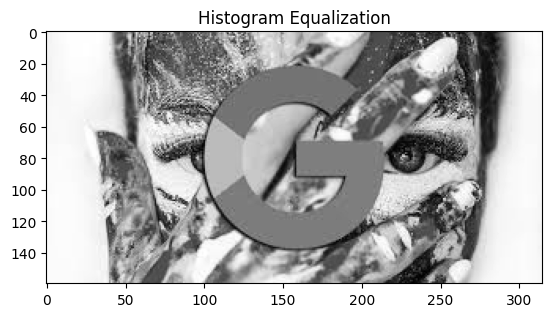

In [40]:
hist_image = histogram_equalization(grayscale_image)
plt.title('Histogram Equalization')
plt.imshow(grayscale_image,cmap='gray')

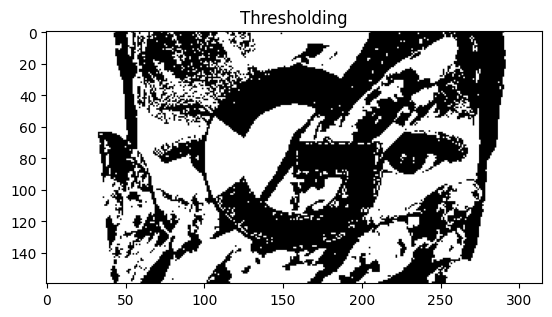

In [41]:
thresholded_image = thresholding(grayscale_image)
plt.title('Thresholding')
plt.imshow(thresholded_image,cmap='gray')

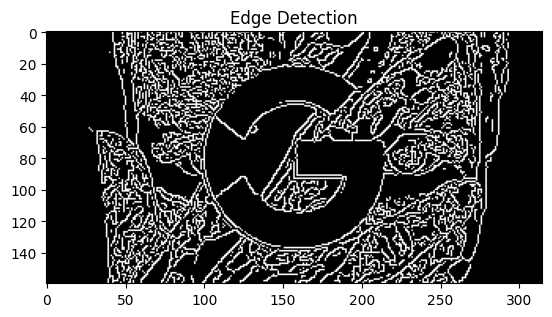

In [45]:
edge_detected_image = edge_detection(grayscale_image)
plt.title('Edge Detection')
plt.imshow(edge_detected_image,cmap='gray')

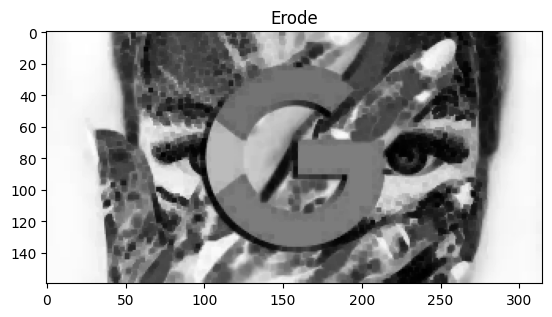

In [56]:
kernel = np.ones((3,3),np.uint8)
morphological_image = morphological_operations(grayscale_image,kernel,'Erode')
plt.title('Erode')
plt.imshow(morphological_image,cmap='gray')

In [69]:
dataaugmentation_image = dataaugmentation(grayscale_image)
plt.title('Data Augmentation')
plt.imshow(dataaugmentation_image,cmap='gray')

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (160, 315))